In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pima Indians - Diabetes Dataset
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

**Mitko Stoychev**
11/05/2024

## 1. Introduction

**Context about this notebook**
This is one of my first data science projects. I will try to make an exhaustive EDA and then apply different machine learning models. I am open to any criticism and suggestions. I am just starting on this data journey, so I assume that this analysis could have some errors or many possible improvements.

**Context about the dataset**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**What is Diabetes ?**
According to FDA, Diabetes is a chronic (long-lasting) health condition that happens when the level of glucose in blood (blood sugar) is too high. Insulin is a hormone made by the pancreas that helps move sugar out of blood and into cells for energy. An estimated 30 million people in the United States are living with diabetes. About 1 in 4 people living with diabetes don’t know they have it. Diabetes disproportionately affects racial and ethnic minorities and other diverse groups.

In the article "Diabetes: Living with a Chronic Disease" we can quote the following:

- "The year 2021 marked the 100th anniversary of the discovery of insulin. Before insulin was discovered, people with diabetes didn’t live long lives. Since then, we’ve come a long way in reducing the toll diabetes takes on people’s daily lives. But the fight isn’t over.

- Today, the number of people with diabetes is higher than it has ever been. And it’s not just your grandparents you have to worry about. People are developing diabetes at younger ages and at higher rates. But the more you know about diabetes, the more you can do about preventing it, delaying it, or lessening its harmful effects."

![Texto alternativo](https://cdn1.byjus.com/wp-content/uploads/2018/11/biology/2017/08/27111256/0diabeties001.jpg)


In the following notebook, I will try to analize which factors have more importance to diabetes disease. 

In the dataset, we can find the next features:
* 1. Pregnancies: number of times pregnant
* 2. Glucose: express the Glucose level in blood, Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* 3. BloodPressure: Diastolic blood pressure (mm Hg)
* 4. SkinThickness: Triceps skin fold thickness (mm)
* 5. Insulin: express the Insulin level in blood, 2-Hour serum insulin (mu U/ml)
* 6. BMI: Body Mass Index, (weight in kg/(height in m)^2)
* 7. DiabetesPedigreeFunction: Diabetes pedigree function to express the Diabetes percentage, 
* 8. Age: age (years)
* 9. Outcome: express the final result 1 is YES o is NO

## 2. Load the dataset

In [2]:
data = pd.read_csv("data/diabetes.csv")
print(data.shape)
data.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Good Practice → change column names to snakecase and lowercase
data.rename(columns={
    'Pregnancies': 'pregnancies',
    'Glucose': 'glucose',
    'BloodPressure': 'blood_pressure',
    'SkinThickness': 'skin_thickness',
    'Insulin': 'insulin',
    'BMI': 'bmi',
    'DiabetesPedigreeFunction': 'diabetes_pedigree_function',
    'Age': 'age',
    'Outcome': 'outcome'
}, inplace=True)

## 3. First look at the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


At first glance I can see that the dataset is very small (768 entries) and there are **not** any **null values** in the dataset. That´s good because I don´t have to clean them.

However, we can see that there are **min values** equal to **zero**. This means that they are non-null, but empty data. This could confuse the model. I would have to deal with it later. 

Another point that catches my attention is the Insulin. The mean is 78.7 and the standard deviation is 115.2. This is very strange at first glance. It may be my ignorance on the subject. I would have to do more research on the behavior of insulin in the human body.

Anyway let us explore the "outcome" column too take a first look for the diabetic distribution of the dataset.

In [6]:
# OUTCOME COLUMN  → Check diabetes distribution among the patients 
data_2 = data.copy()

data_2["outcome"] = data_2["outcome"].map({0: "non-diabetic", 1: "diabetic"})
outcome_counts = data_2["outcome"].value_counts()
labels = outcome_counts.index
counts = outcome_counts.values

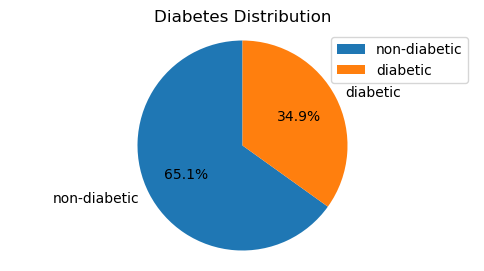

In [7]:
plt.figure(figsize=(6,3))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Distribution')
plt.axis('equal')
plt.legend()
plt.show()

This dataset has approx. 35% of the population with a diabetic disease.

This is striking to me because the proportion of diabetes in the world is of 10.5% of the adult population (20-79 years) according to the IDF Diabetes Atlas (2021) reports. In any case, I will keep it in mind.

Before proceeding to the exploration of the data, I am concerned about data equal to zero. It is logical that these rows are not real medical values, but they are empty and may confuse my analysis. I will try to manage them in such a way that they do not hinder my exploration.

## 4. Outlier detection.

Before using any outlier detection method I want to see what is happening with the dataset.

I know that "glucose", "blood_pressure", "skin_thickness", "insulin" and "bmi" equal to zero it´s impossible value with the existence of human beings. How many records do we have with this condition?

In [8]:
# Check for impossible glucose zero values 
impossible_zeros_glucose = data[data['glucose'] == 0]
impossible_zeros_glucose

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


The impossible glucose values are row 75, 182, 242, 349 and 502. 

I can note insuline value is missing too. Considering that both values have impact in the diabetes prevalence and that this small dataset with 768 rows, deleting these rows might not significantly affect the analysis. 

For me fill these values with an invented value (arithmetic mean, for example) is worse decision. I am working with a medical dataset, so making up medical test results does not seem to be the best idea.

In [9]:
# Replace impossible zero values with NaN
data['glucose'] = data['glucose'].replace(0, float('nan'))

# Drop rows with empty 'Glucose' and 'Insulin' values
data.dropna(subset=['glucose'], inplace=True)

print(data.shape)

(763, 9)


In [10]:
# Check for impossible zero values 
data[(data['blood_pressure'] == 0) | (data['skin_thickness'] == 0) | (data['insulin'] == 0) | (data['bmi'] == 0)]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
5,5,116.0,74,0,0,25.6,0.201,30,0
7,10,115.0,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74,31,0,44.0,0.403,43,1
762,9,89.0,62,0,0,22.5,0.142,33,0
764,2,122.0,70,27,0,36.8,0.340,27,0
766,1,126.0,60,0,0,30.1,0.349,47,1


It is logical that I **cannot afford to delete 371 rows** of a dataset with 763 rows. So, let's see how we manage this problem. Let´s see if correlations give us an idea about the importance of the features.

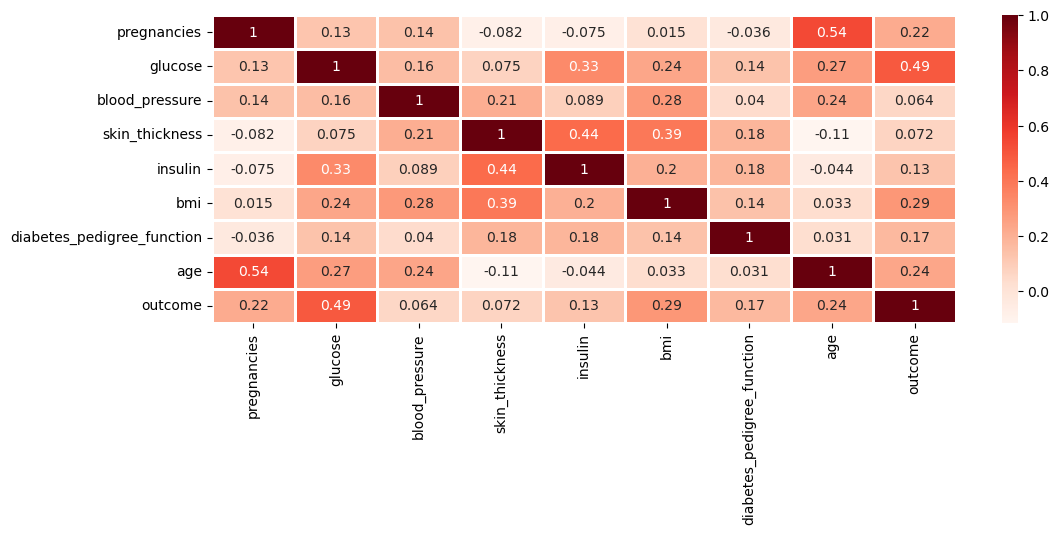

In [11]:
# Heatmap to check any correlations
plt.figure(figsize=(12,4))
sns.heatmap(data.corr(), annot=True, linewidth=1, cmap="Reds")
plt.show()

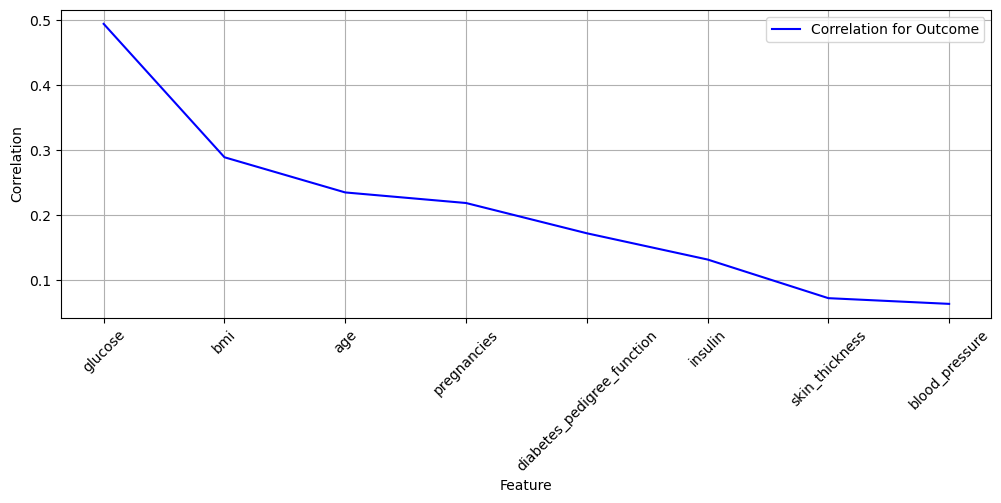

In [12]:
plt.figure(figsize=(12,4))
plt.plot(data.corr()["outcome"].sort_values(ascending=False)[1:],label="Correlation for Outcome",color="blue")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(True)
plt.legend()
plt.show()

With the **Pearon Correlation method** is seems that only "glucose", "bmi", "age" and maybe "pregnancies" feature seem to have some low correlation with the survival probability.

It **doesn't mean that the other features are not usefull**. In one hand, it is well known to all that insulin treatment is prescribed in diabetics. In the other hand, subpopulations in these features can be correlated with diabetic disease. To determine this, we need to explore in detail these features by grouping. But first let´s mange the zero values.

In [13]:
impossible_zeros_insulin = data[data['insulin'] == 0]
impossible_zeros_insulin

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
5,5,116.0,74,0,0,25.6,0.201,30,0
7,10,115.0,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74,31,0,44.0,0.403,43,1
762,9,89.0,62,0,0,22.5,0.142,33,0
764,2,122.0,70,27,0,36.8,0.340,27,0
766,1,126.0,60,0,0,30.1,0.349,47,1


Because insulin is very important in the detection of diabetes and half of the records are missing, I decide to delete the column because filling the missing data would not be a correct practice. 

It should be noted that the hormone insulin is the treatment par excellence for diabetes, therefore blood levels are of enormous importance. Due to the great absence of data in this dataset, I decide to delete this feature. I understand that this is a **point for serious discussion**.

In [14]:
data.drop(["insulin"], axis=1, inplace=True)

In [15]:
impossible_zeros_bmi = data[data['bmi'] == 0]
impossible_zeros_bmi

,pregnancies,glucose,blood_pressure,skin_thickness,bmi,diabetes_pedigree_function,age,outcome
9,8,125.0,96,0,0.0,0.232,54,1
49,7,105.0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0.0,0.304,21,0
81,2,74.0,0,0,0.0,0.102,22,0
145,0,102.0,75,23,0.0,0.572,21,0
371,0,118.0,64,23,0.0,1.731,21,0
426,0,94.0,0,0,0.0,0.256,25,0
494,3,80.0,0,0,0.0,0.174,22,0
522,6,114.0,0,0,0.0,0.189,26,0
684,5,136.0,82,0,0.0,0.640,69,0


Body Mass Index is the second more correlated feature after insuline. Here I will make the same decision and I will delete the above 9 rows.

In [16]:
# Replace impossible zero values with NaN
data['bmi'] = data['bmi'].replace(0, float('nan'))

# Drop rows with empty 'bmi' records
data.dropna(subset=['bmi'], inplace=True)

print(data.shape)

(752, 8)


In [17]:
summary = {}
for column in data.columns:
    zero_count = (data[column] == 0).sum()
    if zero_count > 0:
        summary[column] = zero_count

summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Zero_Count'])
summary_df

,Zero_Count
pregnancies,108
blood_pressure,28
skin_thickness,218
outcome,488


In order not to lose many more records and because "blood_pressure" and "skin_thickness" are the features with the lowest correlation, I will delete only the records where both data are missing. 

For the remaining data equal to zero, they will be filled with the arithmetic mean. I guess it's not the best decision, considering that "blood pressure" has a mean of 20.7 and a std of 15.93....  but I can't delete more than 200 records in such a small dataset. I still keep in mind that "blood_pressure" is the less correlated with the diabetes.

In [18]:
impossible_zeros_bp_st = data[(data['blood_pressure'] == 0) & (data['skin_thickness'] == 0)]
impossible_zeros_bp_st

,pregnancies,glucose,blood_pressure,skin_thickness,bmi,diabetes_pedigree_function,age,outcome
7,10,115.0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,30.0,0.484,32,1
78,0,131.0,0,0,43.2,0.270,26,1
193,11,135.0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,30.0,0.761,27,1
266,0,138.0,0,0,36.3,0.933,25,1
269,2,146.0,0,0,27.5,0.240,28,1
300,0,167.0,0,0,32.3,0.839,30,1
332,1,180.0,0,0,43.3,0.282,41,1


In [19]:
# Remove rows where both 'blood_pressure' and 'skin_thickness' are equal to 0
data = data.drop(data[(data['blood_pressure'] == 0) & (data['skin_thickness'] == 0)].index)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)
data

,pregnancies,glucose,blood_pressure,skin_thickness,bmi,diabetes_pedigree_function,age,outcome
0,6,148.0,72,35,33.6,0.627,50,1
1,1,85.0,66,29,26.6,0.351,31,0
2,8,183.0,64,0,23.3,0.672,32,1
3,1,89.0,66,23,28.1,0.167,21,0
4,0,137.0,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
721,10,101.0,76,48,32.9,0.171,63,0
722,2,122.0,70,27,36.8,0.340,27,0
723,5,121.0,72,23,26.2,0.245,30,0
724,1,126.0,60,0,30.1,0.349,47,1


In [20]:
summary = {}
for column in data.columns:
    zero_count = (data[column] == 0).sum()
    if zero_count > 0:
        summary[column] = zero_count

summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Zero_Count'])
summary_df

,Zero_Count
pregnancies,99
blood_pressure,2
skin_thickness,192
outcome,476


In [21]:
# Calculate the mean values for 'skin_thickness' and 'blood_pressure' excluding zeros
mean_skin_thickness = data[data['skin_thickness'] != 0]['skin_thickness'].mean()
mean_blood_pressure = data[data['blood_pressure'] != 0]['blood_pressure'].mean()

# Fill the rows where 'skin_thickness' is equal to 0 with the mean value of 'skin_thickness'
data.loc[data['skin_thickness'] == 0, 'skin_thickness'] = mean_skin_thickness.astype(int)

# Fill the rows where 'blood_pressure' is equal to 0 with the mean value of 'blood_pressure'
data.loc[data['blood_pressure'] == 0, 'blood_pressure'] = mean_blood_pressure.astype(int)

## 5. Explore the data

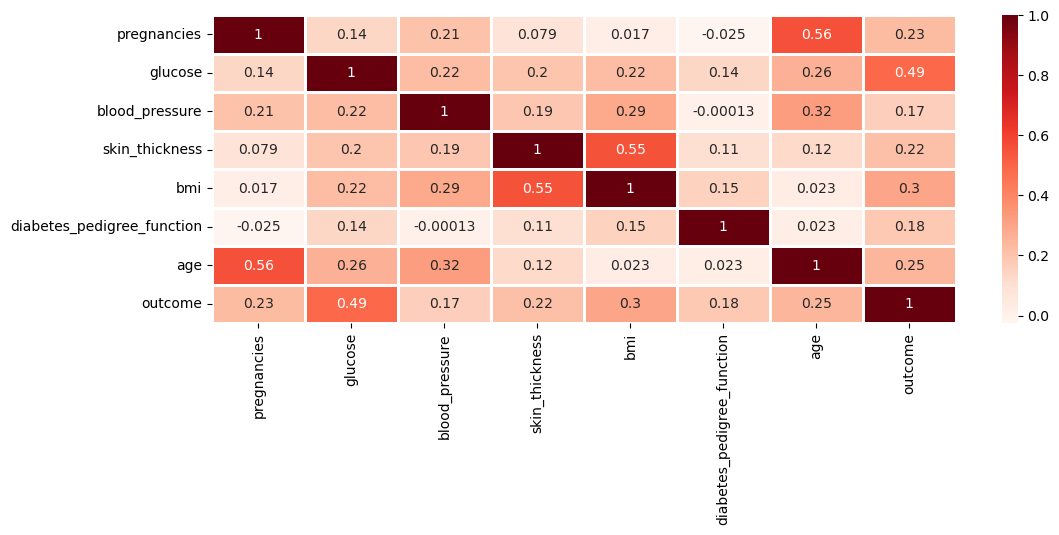

In [22]:
# Heatmap to check any correlations
plt.figure(figsize=(12,4))
sns.heatmap(data.corr(), annot=True, linewidth=1, cmap="Reds")
plt.show()

In [23]:
# GROUPING BY "pregnancies"
data.groupby(["pregnancies"])["outcome"].agg(['mean', 'count'])

,mean,count
pregnancies,,
0,0.323232,99
1,0.213740,131
2,0.185567,97
3,0.361111,72
4,0.323077,65
5,0.363636,55
6,0.326087,46
7,0.571429,42
8,0.555556,36


Women with higher numbers of pregnancies, particularly 7 or more, tend to have a higher mean outcome of diabetes. This indicates that having a higher number of pregnancies might be associated with an increased risk of diabetes.

In [24]:
# GROUPING BY "pregnancies"
data.groupby(["glucose"])["outcome"].agg(['mean', 'count'])

,mean,count
glucose,,
44.0,0.00,1
56.0,0.00,1
57.0,0.00,2
61.0,0.00,1
62.0,0.00,1
...,...,...
195.0,1.00,2
196.0,1.00,3
197.0,0.75,4


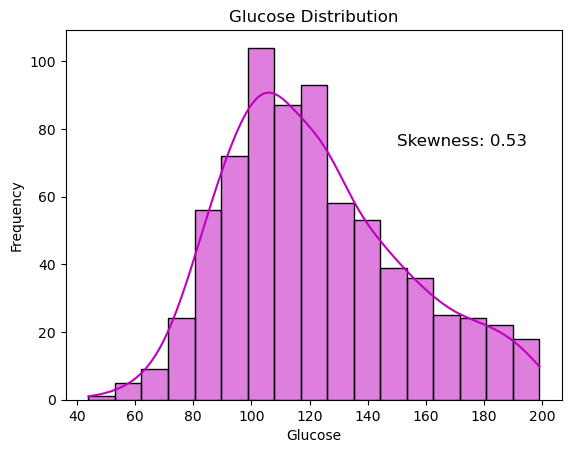

In [25]:
# Exploring Glucose Distribution
sns.histplot(data["glucose"], color="m", kde=True)
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.text(150, 75, "Skewness: %.2f" % data["glucose"].skew(), fontsize=12)
plt.show()

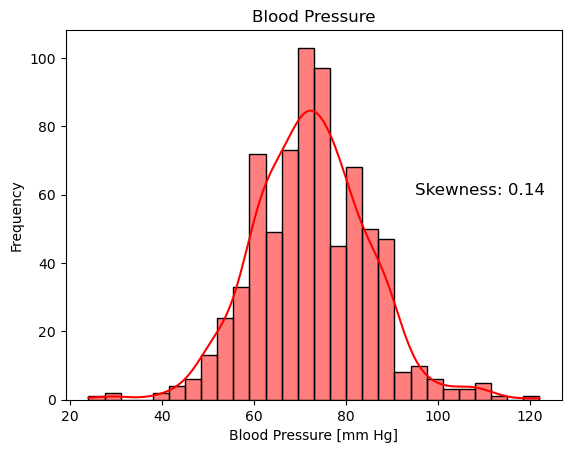

In [26]:
# Exploring Blood Pressure Distribution
sns.histplot(data["blood_pressure"], color="r", kde=True)
plt.title("Blood Pressure")
plt.xlabel("Blood Pressure [mm Hg]")
plt.ylabel("Frequency")
plt.text(95, 60, "Skewness: %.2f" % data["blood_pressure"].skew(), fontsize=12)
plt.show()

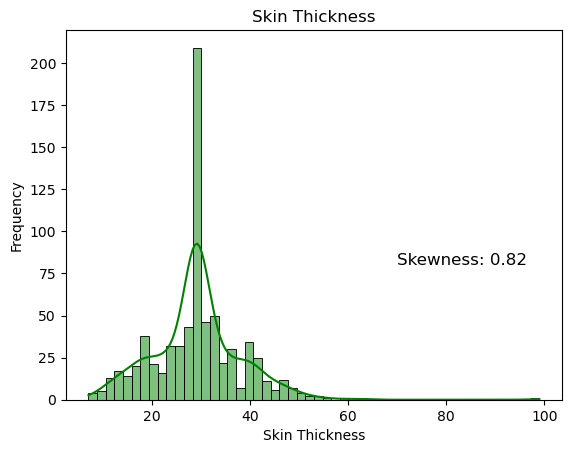

In [27]:
# Exploring skin_thickness Distribution
sns.histplot(data["skin_thickness"], color="g", kde=True)
plt.title("Skin Thickness")
plt.xlabel("Skin Thickness")
plt.ylabel("Frequency")
plt.text(70, 80, "Skewness: %.2f" % data["skin_thickness"].skew(), fontsize=12)
plt.show()

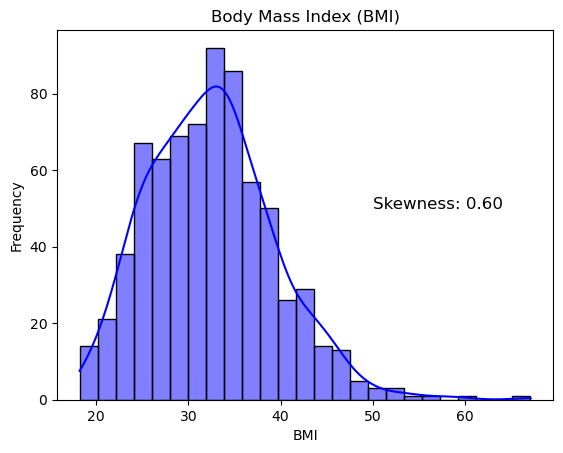

In [28]:
# Exploring body mass index Distribution
sns.histplot(data["bmi"], color="b", kde=True)
plt.title("Body Mass Index (BMI)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.text(50, 50, "Skewness: %.2f" % data["bmi"].skew(), fontsize=12)
plt.show()

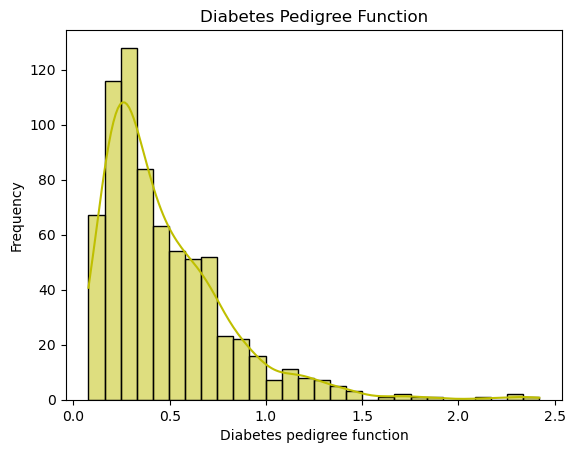

In [33]:
# Exploring body mass index Distribution
sns.histplot(data["diabetes_pedigree_function"], color="y", kde=True)
plt.title("Diabetes Pedigree Function")
plt.xlabel("Diabetes pedigree function")
plt.ylabel("Frequency")
#plt.text(20, 50, "Skewness: %.2f" % data["diabetes_pedigree_function"].skew(), fontsize=12)
plt.show()

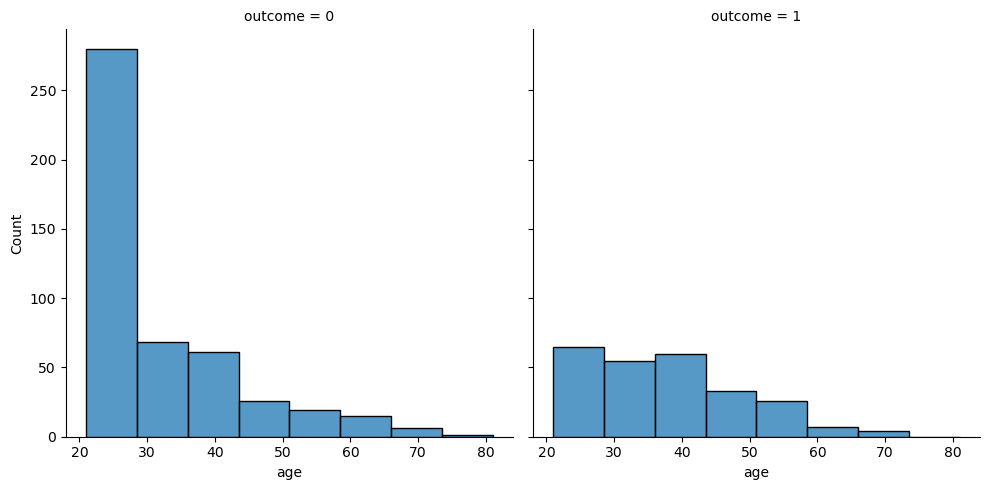

In [51]:
# Grouping by Age 
sns.displot(data, x="age", col="outcome", bins=8)
plt.show()